In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
install.packages("GGally")
library("GGally")
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# loads data from the original source on the web 
shoppers_data_full <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")

# convert our target variable as a factor
shoppers_data <- shoppers_data_full %>% 
    mutate(Revenue = as_factor(Revenue))
shoppers_data

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<fct>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [5]:
set.seed(100)

# split the original data into training set and test set
shoppers_split <- initial_split(data = shoppers_data,
                                prop = 0.75,
                                strate = Revenue)

shoppers_training <- training(shoppers_split)
shoppers_testing <- testing(shoppers_split)

In [6]:
# count the observations in two levels of Revenue and identify the existence of imbalance
shoppers_training_summary <- shoppers_training %>% 
    group_by(Revenue) %>% 
    summarize(observations = n()) 
shoppers_training_summary
# up sampling is required for further analysis

`summarise()` ungrouping output (override with `.groups` argument)



Revenue,observations
<fct>,<int>
FALSE,7831
TRUE,1417


In [12]:
shoppers_analysis_recipe <- recipe(Revenue ~ ., data = shoppers_training) %>%
    step_upsample(Revenue, over_ratio = 1, skip = FALSE) %>% 
    prep()
shoppers_training_upsampled <- bake(shoppers_analysis_recipe,shoppers_training)

# check if training set is balanced
summary(shoppers_training_upsampled$Revenue)
shoppers_training_upsampled

FALSE  TRUE 
 7831  7831

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<fct>
0,0,0,0,2,64.000000,0.00,0.10,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20,0.20,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,337.0,4,693,261,14150.55,0.00598336,0.026011023,0.9519337,0,Nov,2,2,3,2,Returning_Visitor,FALSE,TRUE
4,69.0,0,0,20,1180.00,0.00000000,0.009090909,30.5263636,0,May,2,2,6,3,Returning_Visitor,FALSE,TRUE
4,39.8,0,0,9,132.40,0.00000000,0.006666667,0.0000000,0,Aug,2,2,1,5,New_Visitor,FALSE,TRUE


Warning message in ggcorr(shoppers_training_numeric, hjust = 1, size = 4, label = TRUE):
“data in column(s) 'Month', 'VisitorType', 'Weekend' are not numeric and were ignored”


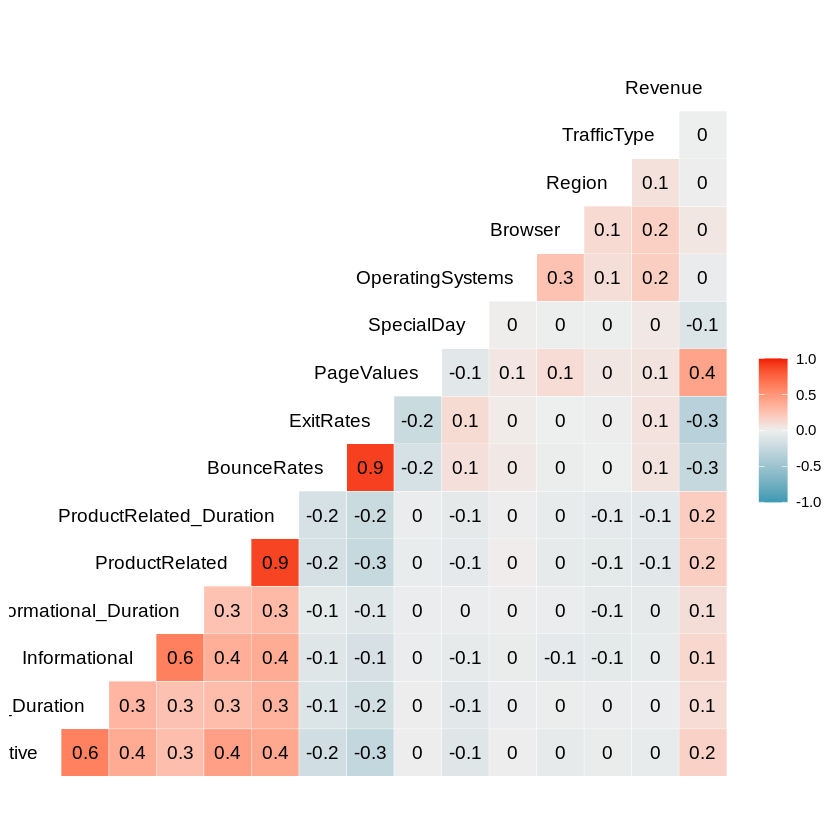

In [13]:
# change the Revenue into a numeric value
shoppers_training_numeric <- shoppers_training_upsampled %>% 
    mutate(Revenue = ifelse(Revenue==TRUE, 1, 0)) 

#  the visualization of correlation coefficients between each numerical variable in our data and our target, Revenue
shoppers_cor <- ggcorr(shoppers_training_numeric, hjust = 1, size = 4,label = TRUE)
shoppers_cor

In [14]:
# Choose the top three variables as predictors with the largest corrlation coefficient
shoppers_training_upsampled <- shoppers_training_upsampled %>% 
    select(BounceRates, ExitRates, PageValues, Revenue)
shoppers_training_upsampled

BounceRates,ExitRates,PageValues,Revenue
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0,FALSE
0.20,0.20,0,FALSE
0.05,0.14,0,FALSE
⋮,⋮,⋮,⋮
0.00598336,0.026011023,0.9519337,TRUE
0.00000000,0.009090909,30.5263636,TRUE
0.00000000,0.006666667,0.0000000,TRUE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



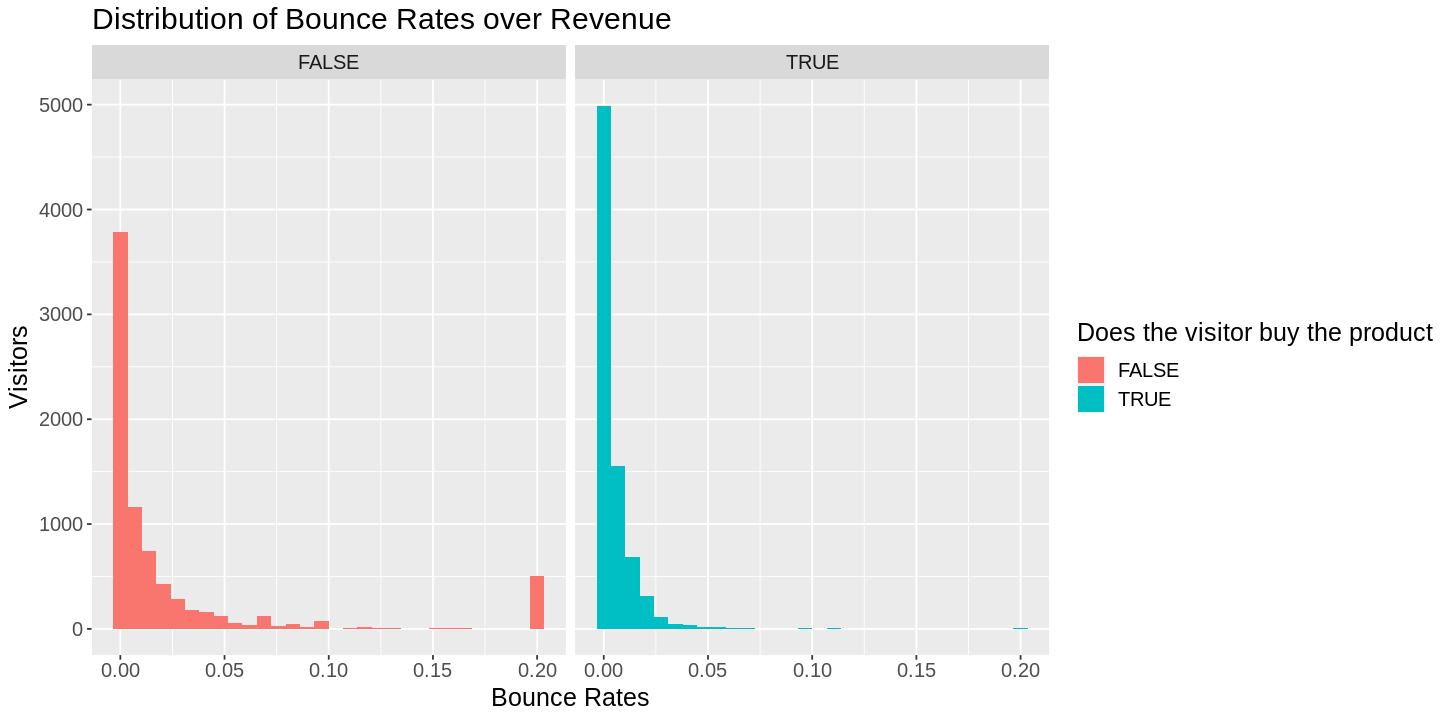

In [61]:
options(repr.plot.height = 6, repr.plot.width = 12)
bounce_hist <- ggplot(shoppers_training_upsampled, aes(x = BounceRates, fill = Revenue)) +
    geom_histogram(position = "identity") +
    facet_grid(. ~ Revenue)+
    labs(x = "Bounce Rates", y = "Visitors", fill = "Does the visitor buy the product",title="Distribution of Bounce Rates over Revenue") +
    theme(text = element_text(size = 15))
bounce_hist

Figure 1: Histogram of Bounce Rates split horizontally by revenue (training set)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



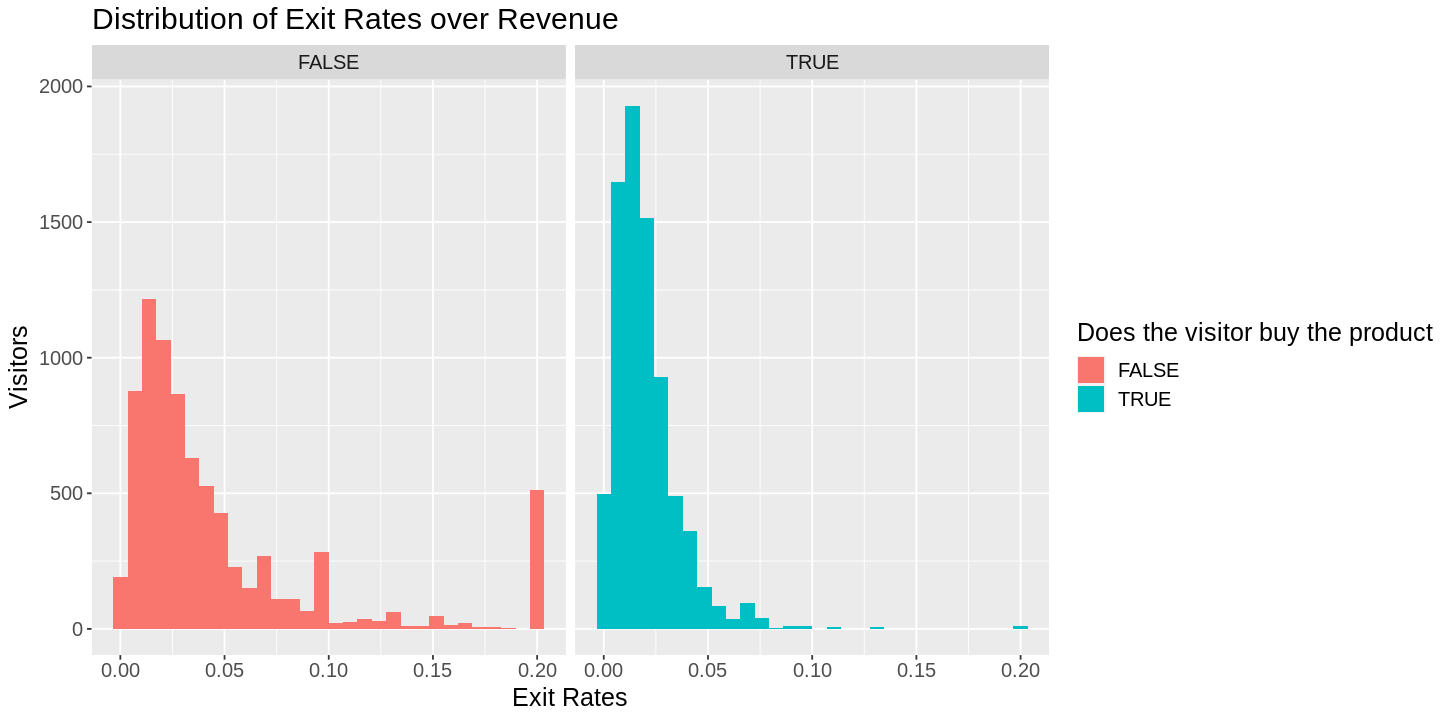

In [62]:
options(repr.plot.height = 6, repr.plot.width = 12)
exit_hist <- ggplot(shoppers_training_upsampled, aes(x = ExitRates, fill = Revenue)) +
    geom_histogram(position = "identity") +
    facet_grid(. ~ Revenue)+
    labs(x = "Exit Rates", y = "Visitors", fill = "Does the visitor buy the product",title="Distribution of Exit Rates over Revenue") +
    theme(text = element_text(size = 15))
exit_hist

Figure 2: Histogram of Exit Rates split horizontally by revenue (training set)

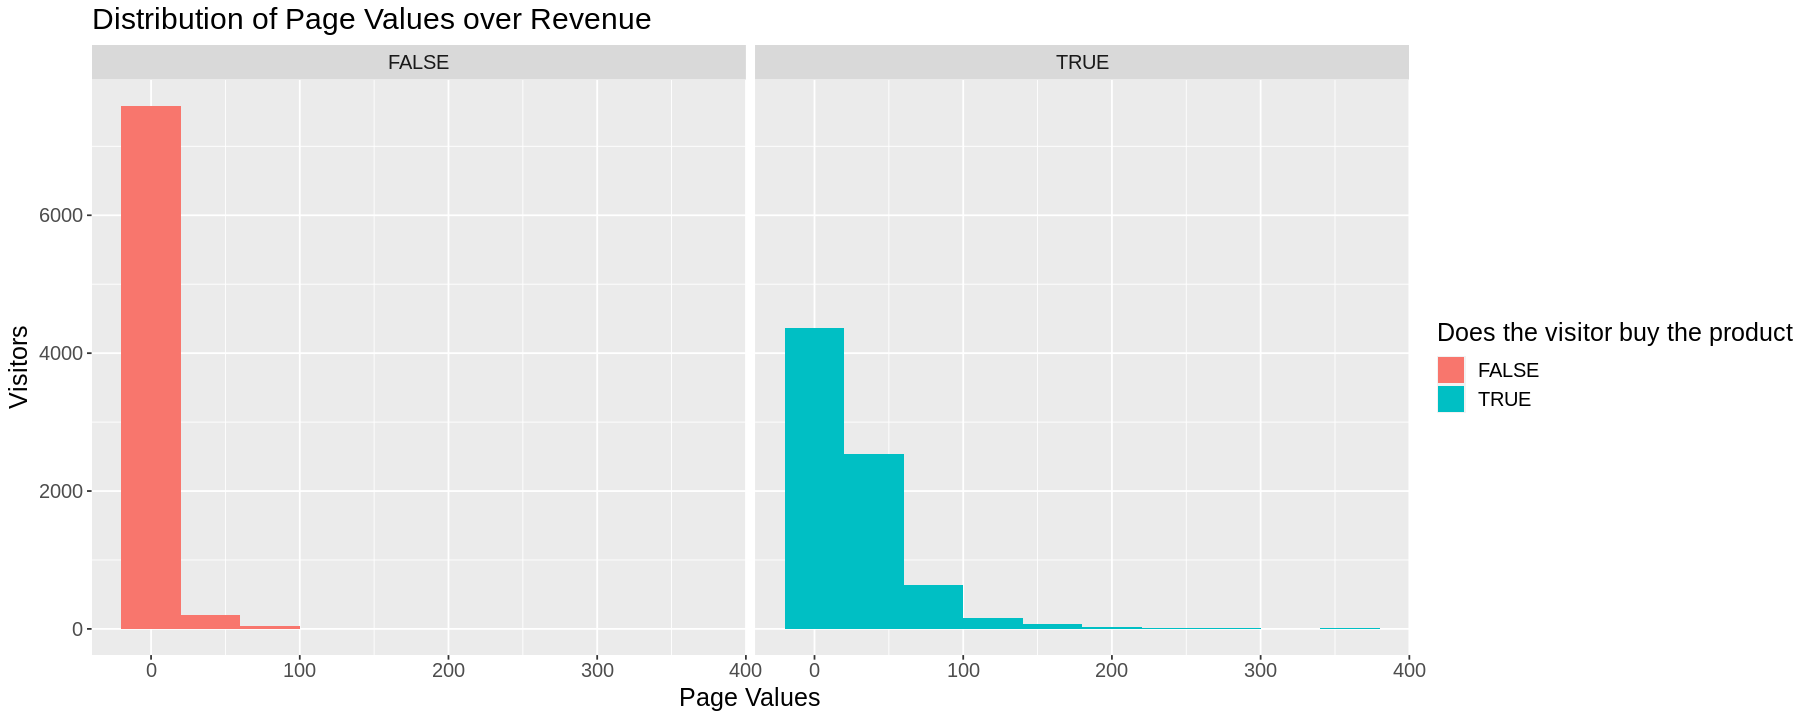

In [63]:
options(repr.plot.height = 6, repr.plot.width = 15)
page_values_hist <- ggplot(shoppers_training_upsampled, aes(x = PageValues, fill = Revenue)) +
    geom_histogram(position = "identity",binwidth=40) +
    facet_grid(. ~ Revenue)+
    labs(x = "Page Values", y = "Visitors", fill = "Does the visitor buy the product",title="Distribution of Page Values over Revenue") +
    theme(text = element_text(size = 15))
page_values_hist

Figure 3: Histogram of Page Values split horizontally by revenue (training set)

In [65]:
# scale and center the training set for k-nearest neighbors algorithm
shoppers_recipe <- recipe(Revenue ~ ., data = shoppers_training_upsampled) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 


In [66]:
# tune the classifier by cross validation
knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) %>%
    set_engine('kknn') %>%
    set_mode('classification')

shoppers_vfold <- vfold_cv(shoppers_training_upsampled, v = 5, strata = Revenue)

shoppers_workflow <- workflow() %>%
    add_recipe(shoppers_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = shoppers_vfold,
              grid = tibble(neighbors = seq(1, 20, 1))) %>%
    collect_metrics()
shoppers_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9247221,5,0.0005605716,Model01
1,roc_auc,binary,0.9247221,5,0.0005605716,Model01
2,accuracy,binary,0.9249778,5,0.0010939837,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,roc_auc,binary,0.9053651,5,0.002116196,Model19
20,accuracy,binary,0.8422935,5,0.002590750,Model20
20,roc_auc,binary,0.9047428,5,0.002080871,Model20


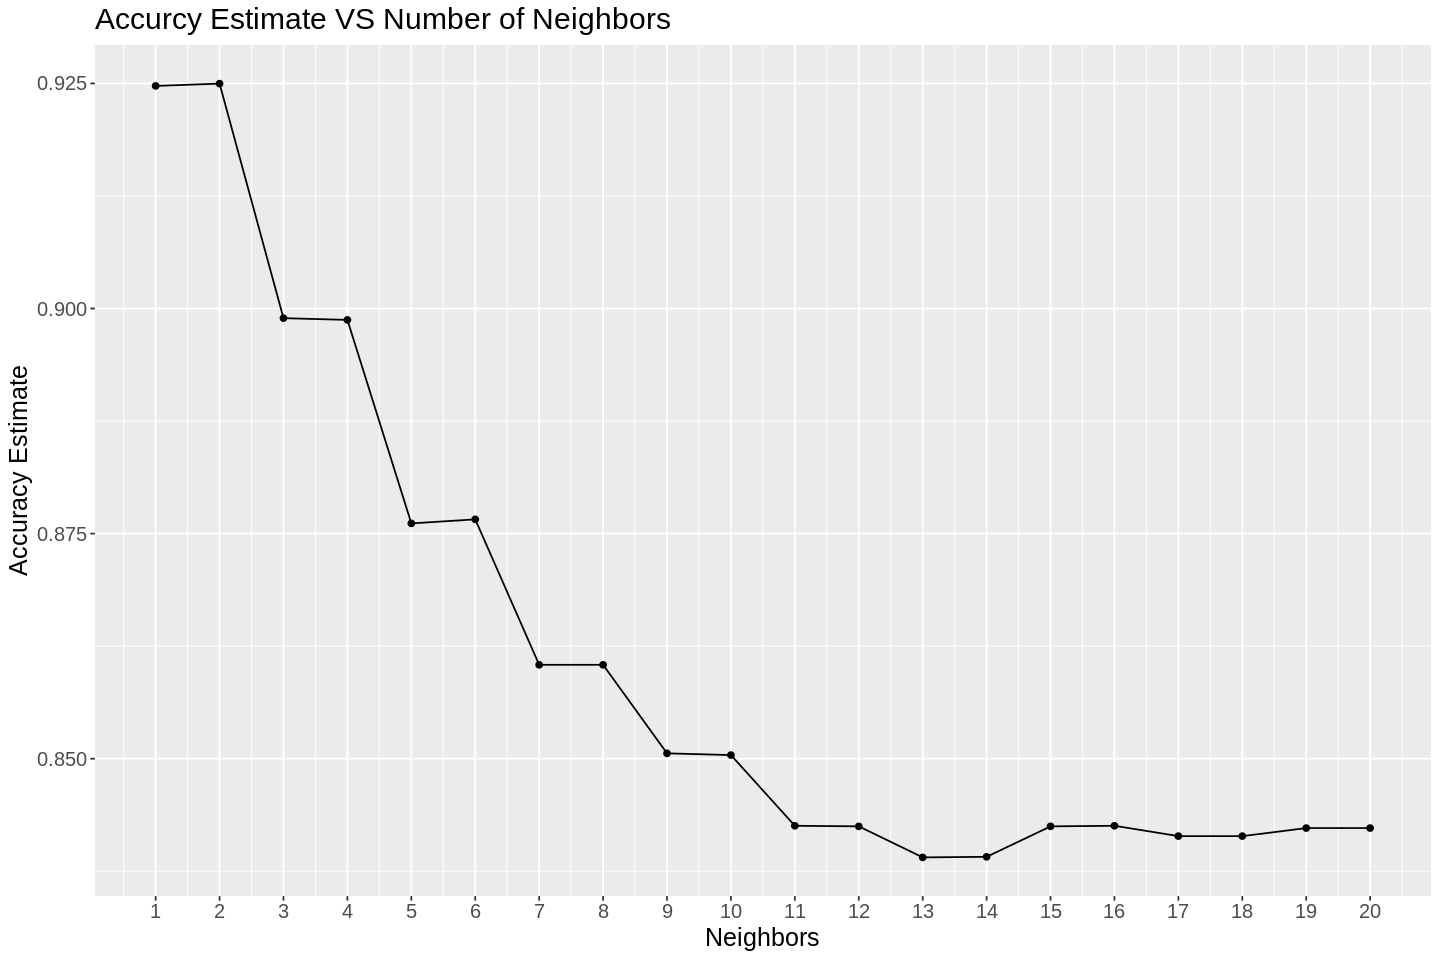

In [115]:
# visualize the relationship between number of neighbors and estimate accuracy
shoppers_accuracy <- shoppers_workflow %>%
    filter(.metric == 'accuracy') %>%
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        scale_x_continuous(breaks = seq(1, 20, by = 1)) +
        labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accurcy Estimate VS Number of Neighbors") + 
        theme(text = element_text(size = 15))
shoppers_accuracy

Figure 4: Scatter plot and line plot of accuracy estimate versus number of neighbours

In [68]:
# choose k = 2 and rebuild the model
knn_spec_k2 <- nearest_neighbor(weight_func = 'rectangular', neighbors = 2) %>%
    set_engine('kknn') %>%
    set_mode('classification')

shoppers_workflow_k2 <- workflow() %>%
    add_recipe(shoppers_recipe) %>%
    add_model(knn_spec_k2) %>%
    fit(data = shoppers_training_upsampled)


In [69]:
# make prediction on test set and bind the prediction to it
prediction <- shoppers_workflow_k2 %>%
    predict(shoppers_testing) %>%
    bind_cols(shoppers_testing)

# calculate the accuracy
prediction_metrics <- prediction %>%
    metrics(truth = Revenue, estimate = .pred_class)   

prediction_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8637249
kap,binary,0.4756724


In [72]:
shoppers_mat <- prediction %>%
      conf_mat(truth = Revenue, estimate = .pred_class) 

shoppers_mat

          Truth
Prediction FALSE TRUE
     FALSE  2399  228
     TRUE    192  263

In [82]:
# create the grid of area/smoothness vals, and arrange in a data frame
page_grid <- seq(min(shoppers_data$PageValues), max(shoppers_data$PageValues), length.out = 150)
bounce_grid <- seq(min(shoppers_data$BounceRates), max(shoppers_data$BounceRates), length.out = 80)
exit_grid <- seq(min(shoppers_data$ExitRates), max(shoppers_data$ExitRates), length.out = 80)
asgrid <- as_tibble(expand.grid(PageValues = page_grid, BounceRates = bounce_grid, ExitRates = exit_grid))

In [83]:
# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(shoppers_workflow_k2, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>% rename(Revenue = .pred_class)

In [75]:
# mannually choosing the colors
cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999")

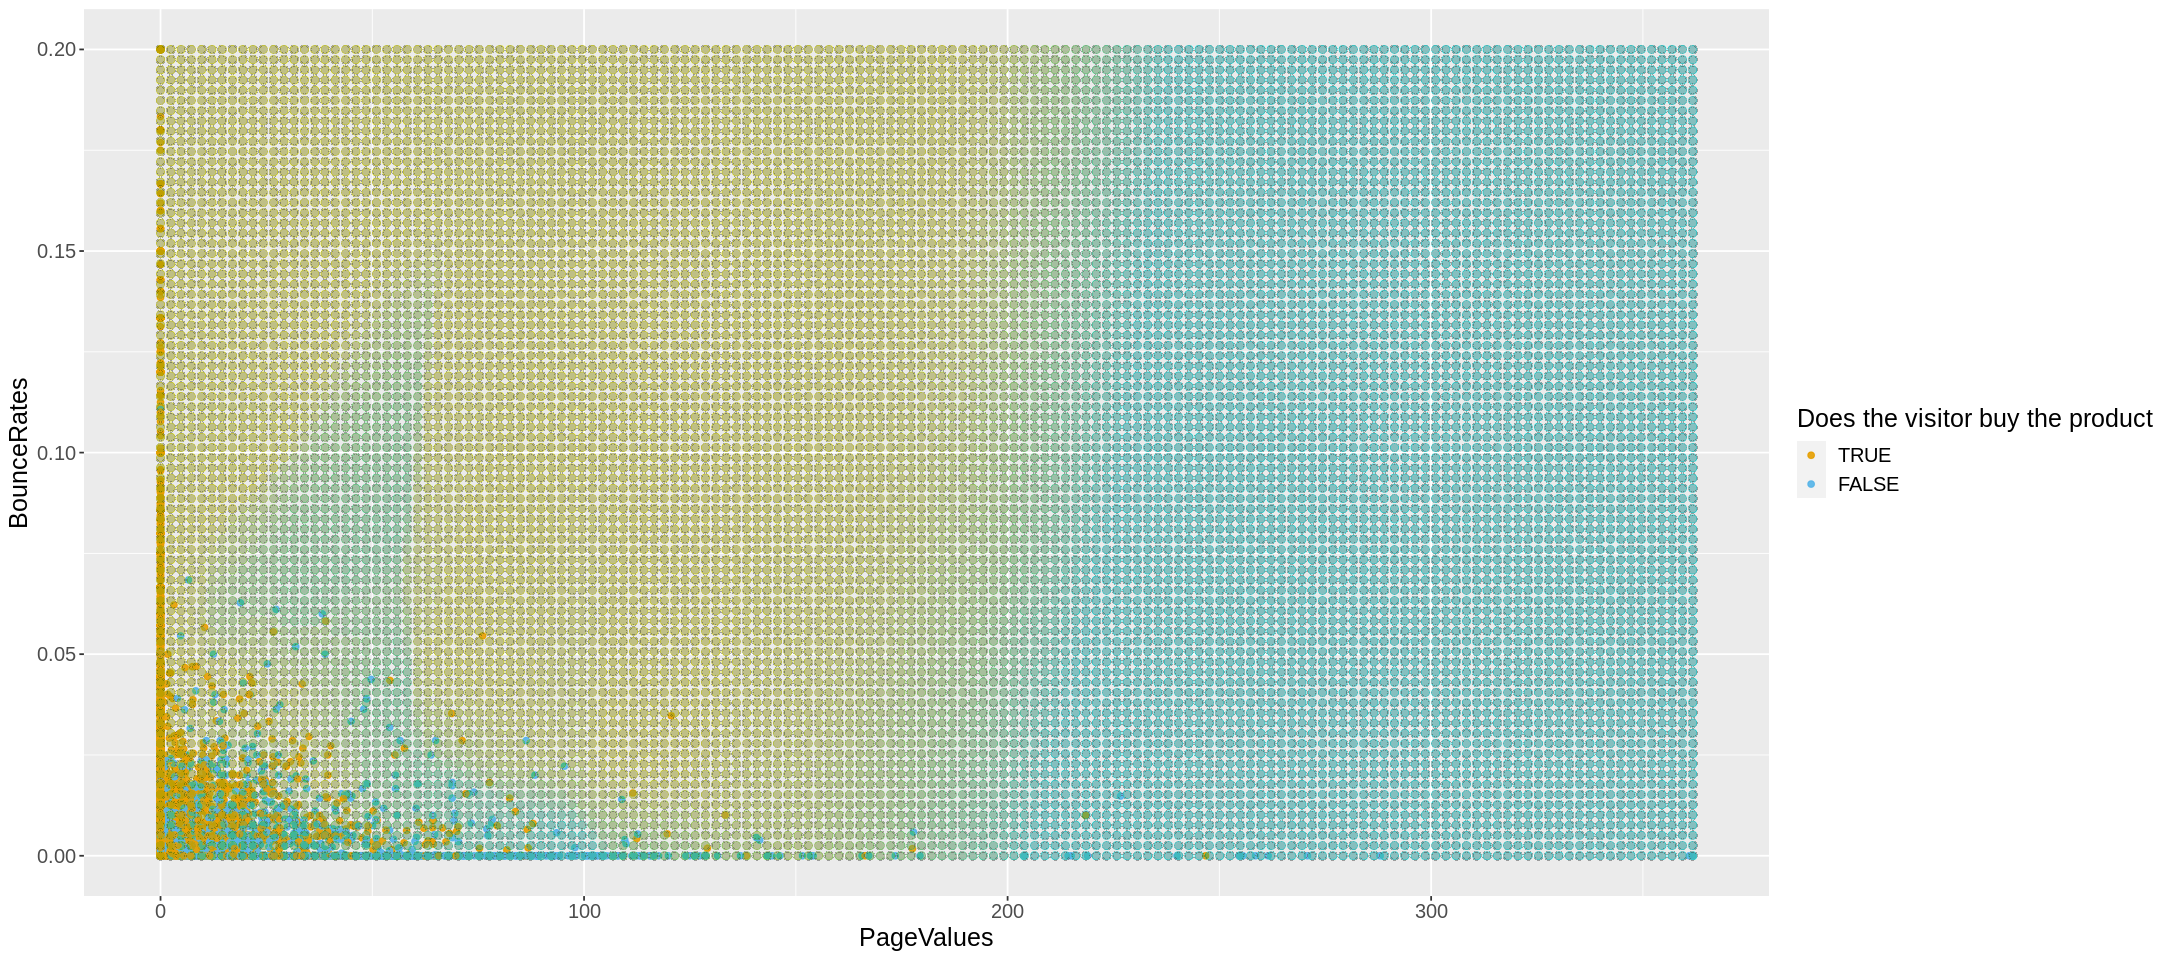

In [98]:
# plot:
# 1. the coloured scatter of the original data
# 2. the faded coloured scatter for the grid points
options(repr.plot.width = 18, repr.plot.height = 8)
page_bounce_plot <-
    ggplot() +
    geom_point(data = shoppers_data, mapping = aes(x = PageValues, y = BounceRates, color = Revenue), alpha = 0.9) +
    geom_point(data = prediction_table, mapping = aes(x = PageValues, y = BounceRates, color = Revenue), alpha = 0.006, size = 2.) +
    labs(color = "Does the visitor buy the product") +
    scale_color_manual(labels = c("TRUE", "FALSE"), values = cbPalette) + 
    theme(text = element_text(size = 15))
page_bounce_plot

Figure 5: Scatterplot of Bounce Rates versus Page Values where background colour indicates the decision of the classifier

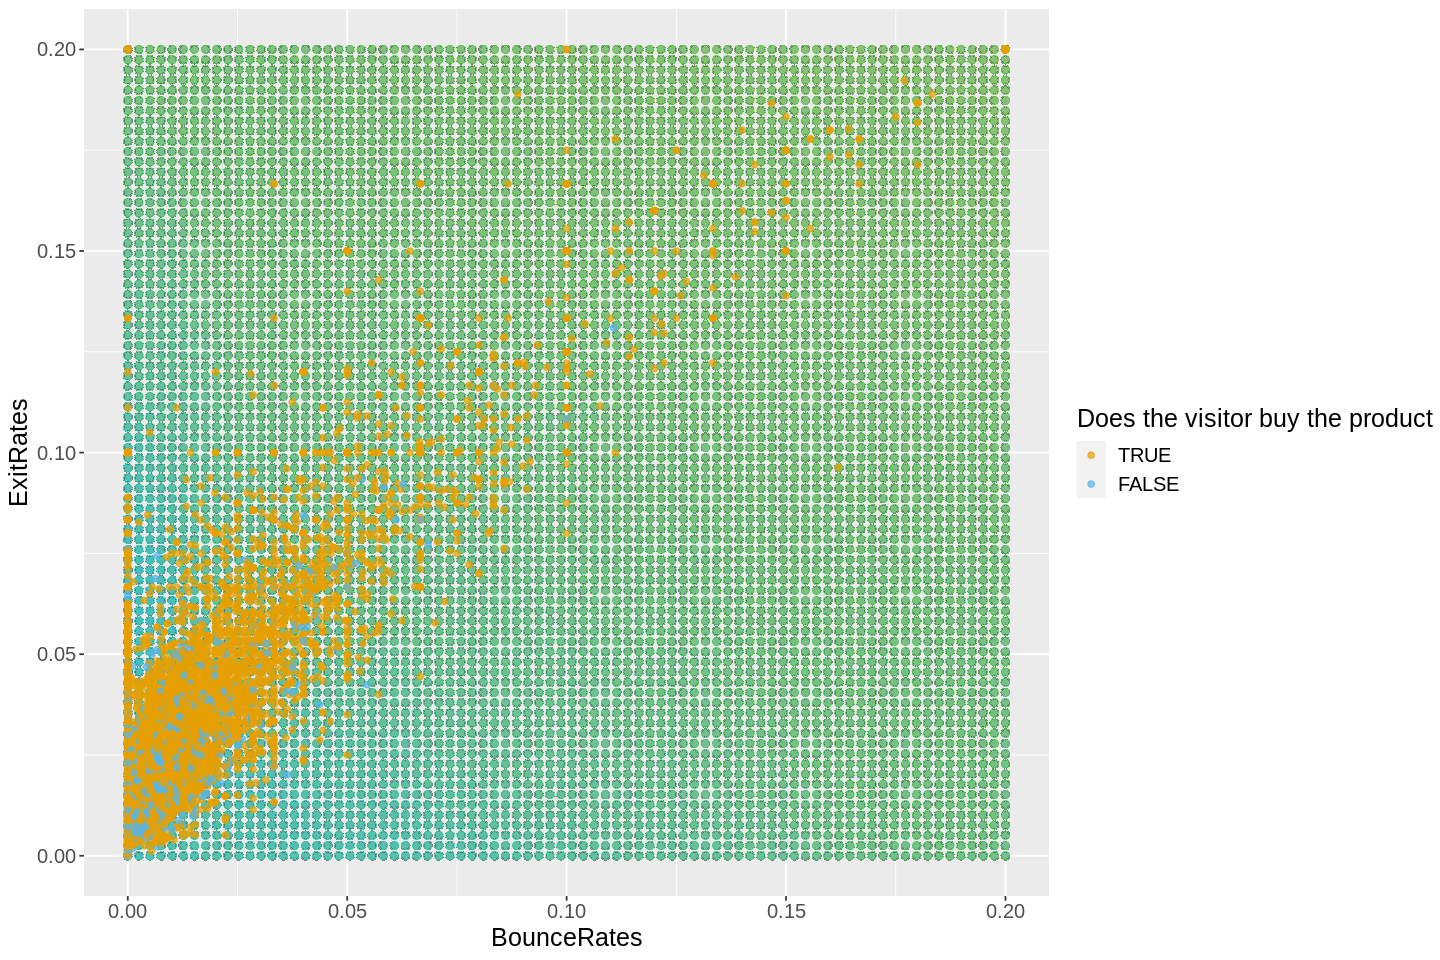

In [114]:
# plot:
# 1. the coloured scatter of the original data
# 2. the faded coloured scatter for the grid points
options(repr.plot.width = 12, repr.plot.height = 8)

bounce_exit_plot <-
  ggplot() +
  geom_point(data = prediction_table, mapping = aes(x = BounceRates, y = ExitRates, color = Revenue), alpha = 0.006, size = 2.) +
  geom_point(data = shoppers_data, mapping = aes(x = BounceRates, y = ExitRates, color = Revenue), alpha = 0.7) +
  labs(color = "Does the visitor buy the product") +
  scale_color_manual(labels = c("TRUE", "FALSE"), values = cbPalette)+ 
theme(text = element_text(size = 15))
bounce_exit_plot

Figure 6: Scatterplot of Exit Rates versus Bounce Rates where background colour indicates the decision of the classifier

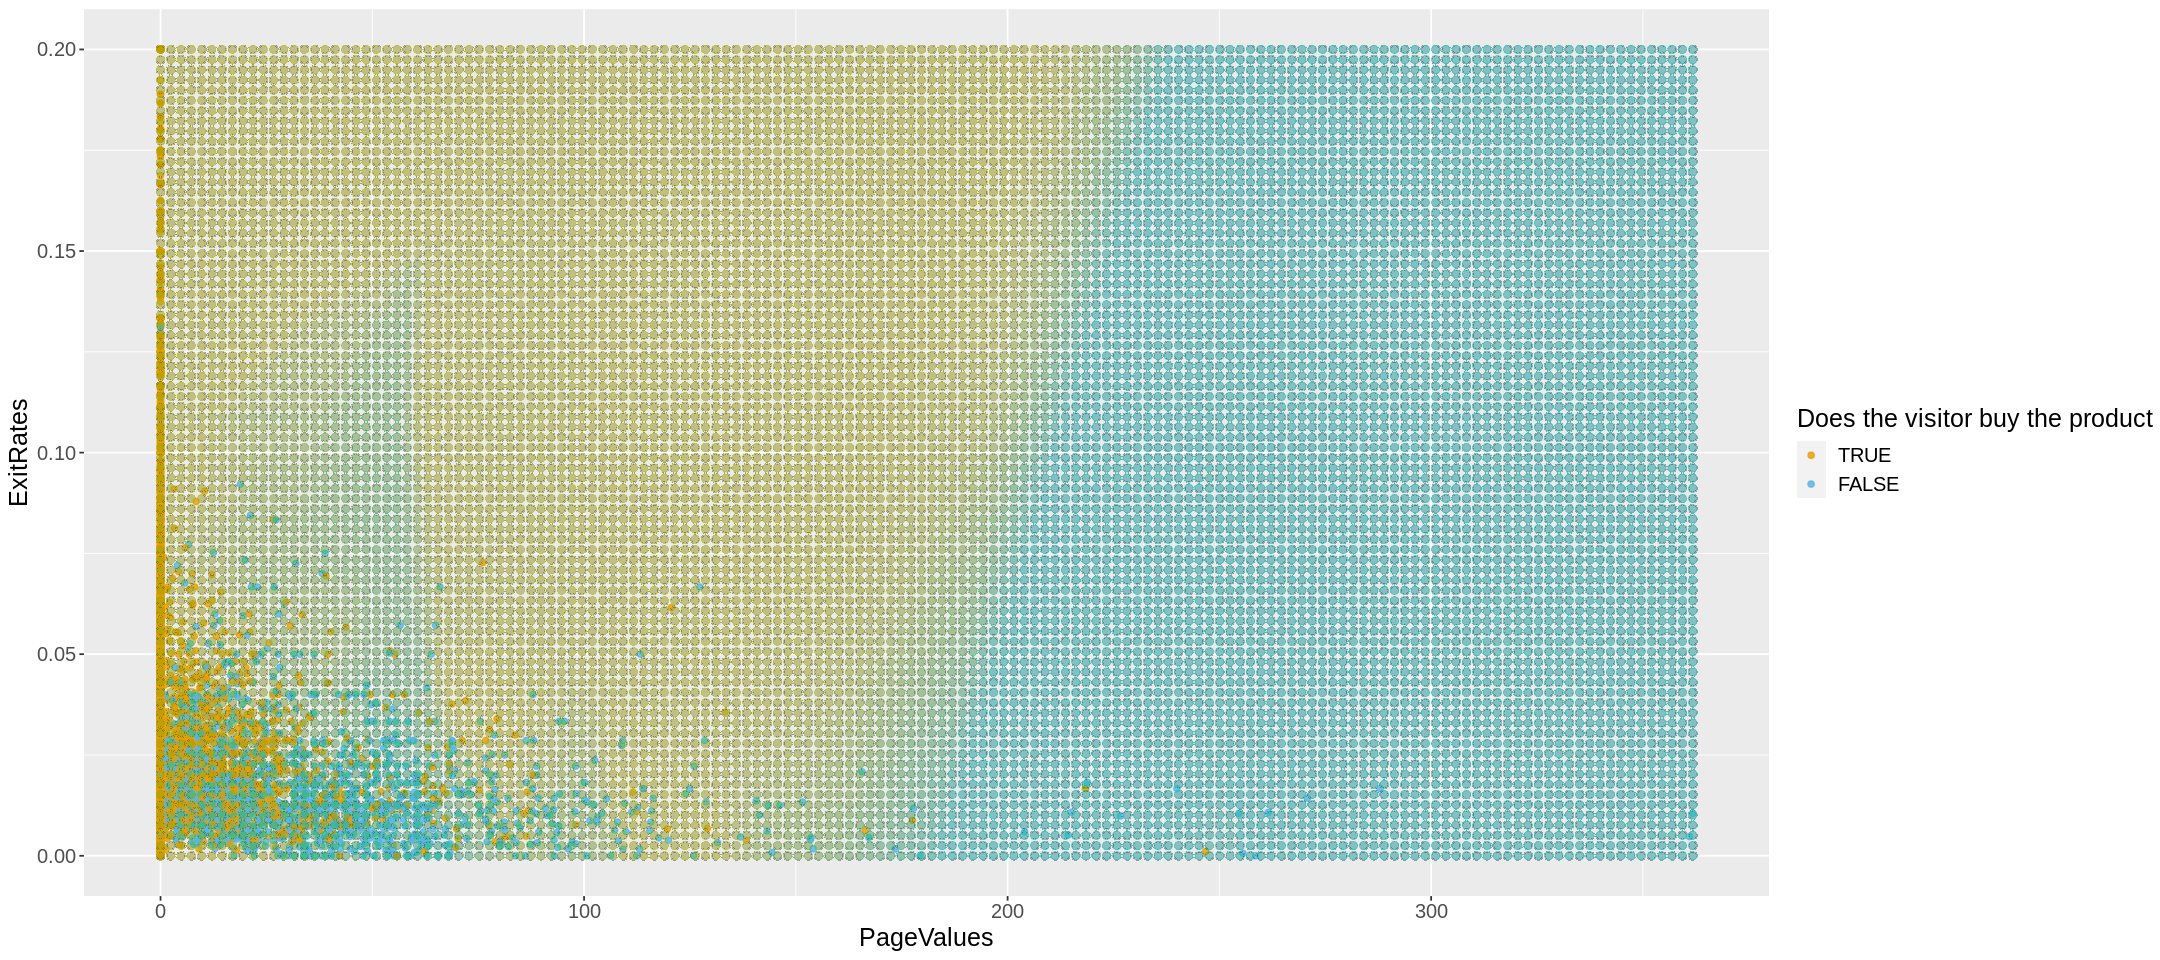

In [108]:
# plot:
# 1. the coloured scatter of the original data
# 2. the faded coloured scatter for the grid points
options(repr.plot.width = 18, repr.plot.height = 8)

page_exit_plot <-
  ggplot() +
  geom_point(data = shoppers_data, mapping = aes(x = PageValues, y = ExitRates, color = Revenue), alpha = 0.8) +
  geom_point(data = prediction_table, mapping = aes(x = PageValues, y = ExitRates, color = Revenue), alpha = 0.006, size = 2.) +
  labs(color = "Does the visitor buy the product") +
  scale_color_manual(labels = c("TRUE", "FALSE"), values = cbPalette)+ 
  theme(text = element_text(size = 15))
page_exit_plot

Figure 6: Scatterplot of Exit Rates versus Page Values where background colour indicates the decision of the classifier

# Discussion

In conclusion, we have built a knn classification model based on clickstream data of online shoppers to predict their purchase intention. From the 3 visualization scatter plots we can see that PageValue is doing a good job in separating two classes of shoppers (figure 5 and figure 7), while exit rates and bounce rates do not predict well on our test set (figure 6).

In figure 6, the two colors  indicating the Revenue (whether a customer buys a product or not) are not clearly distinguished. The color fields overlap with each other showing that for each particular pair of values Bounce Rates and Exit Rates, the boundary between predicting Revenue to be true or false is very vague. This suggests that it would be difficult to use these two variables - Bounce Rates and Exit Rates- to effectively predict Revenue. On the other hand, figures 5 and 7 display an obvious horizontal separation of the two colors, corresponding to the variable Page Values on the horizontal axis. The clearly distinguishable color fields imply that Page Values does a good job of telling the difference between the two customers’ decision. More specifically, the Page Values’ numbers from 0 to 75 and from around 200 to above seem to be associated with the customers’ decision not to buy the product while for other values of Page Values, the firms would likely generate revenues from their customers.

In this scenario, the potential risk for making type 1 error is that the firms would waste money and time on advertising or such to the customers that would not buy the product. At the same time, the firms may lose focus on potential customers which leads to a loss in their profit if type 2 errors happen. By comparing the columns of the confusion matrix, we can see that the false positive rate(192/(192+2399))  of our model is much lower than the false negative rate(228/(263+228)), indicating that the model is more likely to make type 2 errors.

This is also what we expected to find as from the correlation matrix we performed during the data preprocessing, Page Values was the variable that had the highest correlation with Revenue, advising that this variable might be useful in predicting Revenue. However, even though Page Values had the highest correlation with Revenue among all the potential predictors, the correlation itself was only 0.4 - not a high value. Therefore, we did not expect Page Values alone to well predict Revenue. Meanwhile, as shown in the data exploration, the data is imbalanced and has many more cases where customers do not buy the product. Since we do not have much information about these customers, it is within our expectation that the model does not predict well in this case thus we had more type 2 errors.

Such findings would allow firms to choose the predictor - Page values - to predict their customers’ decision while avoiding the other predictors that yield high errors, thus save on costs and time when building their own prediction model. This finding, therefore, would help firms classify online shoppers, targeting their potential customers and deliver more effective services and advertisements to these customers that will finally result in higher revenue for the firms.

Possibilities for future research include building the model using other predictors to check their accuracies, collecting data about new variables that might be more helpful in predicting Revenue, or using other methods beyond the scope of our project that would improve the accuracy of our existing model. Additionally, when building our model, due to limitation of our knowledge, we’ve skipped categorical variables which are potentially effective predictors. Using these variables to build the prediction model could be another direction for future studies.
